### ImagesClassificationWithSIFT with zca_whitening_parameter to True and featurewise_std_normalization_parameter to True with more samples

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)


# import scipy as sio
# print("Scipy Version :"+sio.__version__)
import scipy.io as sio
import os
import shutil
import random
import cv2 as cv
print("OpenCV Version : "+cv.__version__)
from PIL import Image

# To be able to use Warning
import warnings
import sklearn
print("Sklearn Version : "+sklearn.__version__)
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from catboost import CatBoostClassifier
import catboost
print("Catboost Version : "+catboost.__version__)
from catboost import CatBoostClassifier
# from utils import plot_confusion_matrix

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import preprocess_input
from keras.applications import *
from keras.applications.xception import decode_predictions
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import *
import tensorflow as tf
print("Keras Version : "+tf.keras.__version__)
print("Tensorflow Version : "+tf.__version__)

Python Version :sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.5
Pandas Version :1.0.5
Seaborn Version :0.10.1
OpenCV Version : 3.4.2
Sklearn Version : 0.23.1
Catboost Version : 0.24


Using TensorFlow backend.


Keras Version : 2.2.4-tf
Tensorflow Version : 2.1.0


In [2]:
images_directory = './images/Images/'
# train_contents = sio.loadmat('./lists/train_list.mat')
# test_contents = sio.loadmat('./lists/test_list.mat')
# file_list = sio.loadmat('./lists/file_list.mat')
train_directory = './images/train/'
test_directory = './images/test/'

### Rename the folder names

In [ ]:
def convert(word):
    return ''.join(x.capitalize() or '_' for x in word.split('_'))

In [ ]:
for root, dirs, files in os.walk(images_directory):
    for count in dirs:
        print(convert(count.split('-')[1].capitalize()))
        os.rename(os.path.join(images_directory, count), os.path.join(images_directory, convert(count.split('-')[1].capitalize())))


### Creation of the  train test directory

In [ ]:
train_dir = './images/train/'
test_dir = './images/test/'


In [ ]:
files = [file for file in os.listdir(images_directory) if os.path.isfile(os.path.join(images_directory, file))]

In [ ]:
directories = [directory for directory in os.listdir(images_directory)]

In [ ]:
directories

In [ ]:
for directory in directories:
    os.mkdir(train_dir+directory)
    os.mkdir(test_dir+directory)

### Split train test

In [ ]:
directories

In [ ]:
for directory in directories:
    files = [file for file in os.listdir(images_directory+directory) if os.path.isfile(os.path.join(images_directory+directory, file))]
    train_count  = np.round(70/100*len(files))
    test_count = np.round(30/100*len(files))
    rndnums = list(random.sample(range(0, len(files)), len(files)))
    print("len(files)",len(files))
    train_file_index = rndnums[0:int(train_count)+1]
    train_file_name = [files[i] for i in train_file_index]
    test_file_index = rndnums[int(train_count)+1:int(train_count + test_count)+1]
    test_file_name = [files[i] for i in test_file_index]
    for x in train_file_name:
        file = x
        shutil.copyfile(os.path.join(images_directory+directory, file), os.path.join(train_directory+directory, file))
    ##test_files
    for y in test_file_name:
        file = y
        shutil.copyfile(os.path.join(images_directory+directory, file), os.path.join(test_directory+directory, file))

    

In [ ]:
train_file_name

In [3]:
input_directory='./images/'
output_directory='./new_images/'
small_directory_names = [directory for directory in os.listdir(input_directory+'train-small2')]
small_directory_names.sort()
zca_whitening_parameter=True
featurewise_std_normalization_parameter=True
color_mode_parameter='grayscale'
save_prefix_parameter='set1_'
batch_size=2
follow_links=True
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zca_whitening=zca_whitening_parameter,
        featurewise_std_normalization=featurewise_std_normalization_parameter
        )

/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '
/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
small_directory_names

['Basset',
 'BouvierDesFlandres',
 'Cardigan',
 'Dingo',
 'FrenchBulldog',
 'OldEnglishSheepdog']

In [5]:
myCategories = dict(enumerate(small_directory_names))

In [6]:
myCategories

{0: 'Basset',
 1: 'BouvierDesFlandres',
 2: 'Cardigan',
 3: 'Dingo',
 4: 'FrenchBulldog',
 5: 'OldEnglishSheepdog'}

In [7]:
train_generator = train_datagen.flow_from_directory(input_directory+'train-small2', target_size=(224, 224), follow_links=True, batch_size=batch_size, class_mode='categorical', save_format='jpeg', classes=small_directory_names, subset='training', shuffle=False, color_mode=color_mode_parameter)

Found 678 images belonging to 6 classes.


In [8]:
test_generator = train_datagen.flow_from_directory(input_directory+'test-small2', target_size=(224, 224), follow_links=True, batch_size=batch_size, class_mode='categorical', save_format='jpeg', classes=small_directory_names, shuffle=False, color_mode=color_mode_parameter)

Found 284 images belonging to 6 classes.


In [9]:
train_df = pd.DataFrame(columns=["Category", "Picture","Descriptors", "NumberOfDescriptors"])

In [10]:
test_df = pd.DataFrame(columns=["Category", "Picture","Descriptors", "NumberOfDescriptors"])

### Compute the descriptors  and add them with the category into a dataframe

In [11]:
algo_constructor = cv.xfeatures2d.SIFT_create()
def computeDescriptors(mygenerator, mydf, mydescriptors):
    count = 0
    for i in range(len(mygenerator)):
    #next(train_generator)
        for j in range(batch_size):
            img = mygenerator[i][0][j].squeeze()
            imgwithrgb = cv.merge([img, img, img])
            image8bit = cv.normalize(imgwithrgb, None, 0, 255, cv.NORM_MINMAX).astype('uint8')
            keypoints, descriptors = algo_constructor.detectAndCompute(image8bit, None)
            mydf = mydf.append({'Category': mygenerator[i][1][j].tolist().index(1), 'Picture':image8bit, 'Descriptors':descriptors, 'NumberOfDescriptors':descriptors.shape[0]}, ignore_index='True')
            mydescriptors.extend(descriptors)
            count = count + 1
            j = j+1
    i = i+1
    mydf['Category'] = mydf['Category'].map(myCategories) 
    return mydf, mydescriptors

### Train 

In [12]:
train_descriptors_array=[]
train_df, train_descriptors_array=computeDescriptors(train_generator, train_df, train_descriptors_array)

/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
plt.imshow(train_df['Picture'][0])
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(60, 12))
axs[0].set_title('An Original Picture in grayscale  ', fontsize=20)
axs[0].imshow(train_df['Picture'][0], cmap='Greys_r')
axs[1].set_title('Histogram of an original Picture in grayscale ', fontsize=20)
axs[1].set_xlabel('Level of gray', fontsize=20)
axs[1].set_ylabel('Number of pixels', fontsize=20)
axs[1].hist(train_df['Picture'][0].ravel(), 256, [0, 256])


### Test

In [13]:
test_descriptors_array=[]
test_df, test_descriptors_array=computeDescriptors(test_generator, test_df, test_descriptors_array)

In [ ]:
print(train_df['NumberOfDescriptors'].sum())

In [ ]:
print(test_df['NumberOfDescriptors'].sum())

### Apply a Kmeans to get clusters

In [14]:
# A k-means clustering algorithm who takes 2 parameter which is number
# of cluster(k) and the other is descriptors list(unordered 1d array)
# Returns an array that holds central points.
def kmeans(k, descriptor_list):
    # kmeans = KMeans(n_clusters=k, n_init=10)
    mymodel = MiniBatchKMeans(n_clusters=k, n_init=10)
    mymodel.fit(descriptor_list)
    visual_words = mymodel.cluster_centers_
    labels = mymodel.labels_
    silhouette_score = metrics.silhouette_score(descriptor_list, labels)
    calinski_harabasz_score = metrics.calinski_harabasz_score(descriptor_list, labels)
    print('silhouette_score '+str(silhouette_score))
    print('calinski_harabasz_score '+str(calinski_harabasz_score))
    return mymodel, visual_words, labels
# Takes the central points which is visual words
model, visual_words, labels = kmeans(150, train_descriptors_array)

silhouette_score 0.026593229
calinski_harabasz_score 1196.7350958610639


In [15]:
X_train = pd.DataFrame(columns=range(len(visual_words)))
X_test = pd.DataFrame(columns=range(len(visual_words)))

In [16]:
for index, row in train_df.iterrows():
    labels = model.predict(pd.DataFrame(row["Descriptors"]).astype(float))
    unique, counts = np.unique(labels, return_counts=True)
    X_train = X_train.append(dict(zip(unique, counts)), ignore_index=True)

In [17]:
X_train.fillna(0, inplace=True)

In [ ]:
X_train

In [ ]:
train_df

In [18]:
for index, row in test_df.iterrows():
    labels = model.predict(pd.DataFrame(row["Descriptors"]).astype(float))
    unique, counts = np.unique(labels, return_counts=True)
    X_test = X_test.append(dict(zip(unique, counts)), ignore_index=True)

In [19]:
X_test.fillna(0, inplace=True)

In [ ]:
X_test

In [20]:
le = LabelEncoder().fit(train_df['Category'])

In [21]:
y_train = le.transform(train_df['Category'])
y_test = le.transform(test_df['Category'])

In [ ]:
y_test

### TSNE

In [22]:
X_train_embedded = TSNE(n_components=2).fit_transform(X_train)
X_train_embedded_df = pd.DataFrame(X_train_embedded, columns=['SIFT1', 'SIFT2'])

In [23]:
X_train_embedded_df['Category'] = train_df['Category']

silhouette_score -0.09752783
calinski_harabasz_score 13.87975004017746


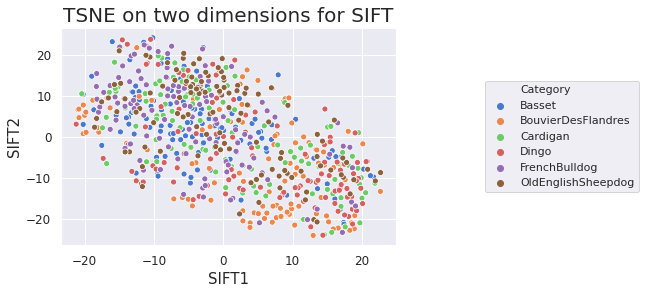

In [26]:
sns.set(palette='muted', color_codes=True, style='darkgrid')
ax = sns.scatterplot(x='SIFT1', y='SIFT2', hue="Category", data=X_train_embedded_df)
ax.set_title('TSNE on two dimensions for SIFT', fontsize=20)
ax.set_xlabel('SIFT1', fontsize=15)
ax.set_ylabel('SIFT2', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.tick_params(labelsize=12)
silhouette_score = metrics.silhouette_score(X_train_embedded, train_df['Category'])
calinski_harabasz_score = metrics.calinski_harabasz_score(X_train_embedded, train_df['Category'])
print('silhouette_score '+str(silhouette_score))
print('calinski_harabasz_score '+str(calinski_harabasz_score))

### CatBoostClassifier 

In [27]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

In [28]:
type(small_directory_names)

list

In [29]:
clf.fit(
    X_train, y_train
    # cat_features=[0, 1, 2]
)

0:	learn: 1.7725675	total: 66.6ms	remaining: 1m 6s
1:	learn: 1.7503289	total: 76.9ms	remaining: 38.4s
2:	learn: 1.7342176	total: 83.7ms	remaining: 27.8s
3:	learn: 1.7143871	total: 91.6ms	remaining: 22.8s
4:	learn: 1.6972276	total: 98.8ms	remaining: 19.7s
5:	learn: 1.6784599	total: 108ms	remaining: 17.9s
6:	learn: 1.6634758	total: 117ms	remaining: 16.5s
7:	learn: 1.6457972	total: 122ms	remaining: 15.2s
8:	learn: 1.6270620	total: 128ms	remaining: 14.1s
9:	learn: 1.6130137	total: 134ms	remaining: 13.3s
10:	learn: 1.6023726	total: 143ms	remaining: 12.9s
11:	learn: 1.5824496	total: 150ms	remaining: 12.3s
12:	learn: 1.5637946	total: 164ms	remaining: 12.4s
13:	learn: 1.5510768	total: 174ms	remaining: 12.2s
14:	learn: 1.5356441	total: 181ms	remaining: 11.9s
15:	learn: 1.5222408	total: 189ms	remaining: 11.6s
16:	learn: 1.5121468	total: 195ms	remaining: 11.2s
17:	learn: 1.5004859	total: 200ms	remaining: 10.9s
18:	learn: 1.4870309	total: 207ms	remaining: 10.7s
19:	learn: 1.4787821	total: 213ms	re

165:	learn: 0.4812054	total: 1.75s	remaining: 8.82s
166:	learn: 0.4778301	total: 1.77s	remaining: 8.83s
167:	learn: 0.4742856	total: 1.78s	remaining: 8.81s
168:	learn: 0.4695510	total: 1.79s	remaining: 8.81s
169:	learn: 0.4657182	total: 1.81s	remaining: 8.83s
170:	learn: 0.4635854	total: 1.82s	remaining: 8.81s
171:	learn: 0.4604519	total: 1.82s	remaining: 8.77s
172:	learn: 0.4580237	total: 1.83s	remaining: 8.74s
173:	learn: 0.4558403	total: 1.83s	remaining: 8.7s
174:	learn: 0.4530614	total: 1.84s	remaining: 8.66s
175:	learn: 0.4487122	total: 1.84s	remaining: 8.62s
176:	learn: 0.4469320	total: 1.84s	remaining: 8.58s
177:	learn: 0.4439211	total: 1.85s	remaining: 8.54s
178:	learn: 0.4422263	total: 1.85s	remaining: 8.51s
179:	learn: 0.4399678	total: 1.86s	remaining: 8.48s
180:	learn: 0.4368434	total: 1.87s	remaining: 8.45s
181:	learn: 0.4337003	total: 1.87s	remaining: 8.41s
182:	learn: 0.4308808	total: 1.88s	remaining: 8.38s
183:	learn: 0.4289975	total: 1.88s	remaining: 8.36s
184:	learn: 0

331:	learn: 0.1955738	total: 3.17s	remaining: 6.38s
332:	learn: 0.1949239	total: 3.18s	remaining: 6.37s
333:	learn: 0.1944065	total: 3.19s	remaining: 6.35s
334:	learn: 0.1936790	total: 3.2s	remaining: 6.35s
335:	learn: 0.1928358	total: 3.21s	remaining: 6.34s
336:	learn: 0.1919563	total: 3.22s	remaining: 6.33s
337:	learn: 0.1916048	total: 3.24s	remaining: 6.35s
338:	learn: 0.1911409	total: 3.26s	remaining: 6.35s
339:	learn: 0.1907323	total: 3.26s	remaining: 6.34s
340:	learn: 0.1899122	total: 3.27s	remaining: 6.32s
341:	learn: 0.1891867	total: 3.28s	remaining: 6.31s
342:	learn: 0.1885399	total: 3.28s	remaining: 6.29s
343:	learn: 0.1881631	total: 3.29s	remaining: 6.28s
344:	learn: 0.1873736	total: 3.3s	remaining: 6.26s
345:	learn: 0.1862743	total: 3.31s	remaining: 6.25s
346:	learn: 0.1852534	total: 3.32s	remaining: 6.24s
347:	learn: 0.1844261	total: 3.32s	remaining: 6.23s
348:	learn: 0.1837147	total: 3.33s	remaining: 6.22s
349:	learn: 0.1829534	total: 3.34s	remaining: 6.21s
350:	learn: 0.

498:	learn: 0.1096827	total: 5.68s	remaining: 5.7s
499:	learn: 0.1092633	total: 5.73s	remaining: 5.73s
500:	learn: 0.1088465	total: 5.74s	remaining: 5.72s
501:	learn: 0.1086597	total: 5.77s	remaining: 5.72s
502:	learn: 0.1083922	total: 5.81s	remaining: 5.74s
503:	learn: 0.1080082	total: 5.83s	remaining: 5.74s
504:	learn: 0.1077599	total: 5.84s	remaining: 5.73s
505:	learn: 0.1073331	total: 5.86s	remaining: 5.72s
506:	learn: 0.1069940	total: 5.95s	remaining: 5.79s
507:	learn: 0.1066442	total: 5.99s	remaining: 5.8s
508:	learn: 0.1063884	total: 6.02s	remaining: 5.81s
509:	learn: 0.1061649	total: 6.07s	remaining: 5.83s
510:	learn: 0.1057355	total: 6.11s	remaining: 5.84s
511:	learn: 0.1054757	total: 6.12s	remaining: 5.83s
512:	learn: 0.1052015	total: 6.17s	remaining: 5.85s
513:	learn: 0.1048249	total: 6.2s	remaining: 5.86s
514:	learn: 0.1044420	total: 6.22s	remaining: 5.86s
515:	learn: 0.1040989	total: 6.24s	remaining: 5.85s
516:	learn: 0.1037831	total: 6.25s	remaining: 5.84s
517:	learn: 0.1

663:	learn: 0.0718347	total: 8.48s	remaining: 4.29s
664:	learn: 0.0716421	total: 8.51s	remaining: 4.29s
665:	learn: 0.0715387	total: 8.53s	remaining: 4.28s
666:	learn: 0.0713515	total: 8.55s	remaining: 4.27s
667:	learn: 0.0712240	total: 8.56s	remaining: 4.26s
668:	learn: 0.0710541	total: 8.57s	remaining: 4.24s
669:	learn: 0.0708724	total: 8.58s	remaining: 4.23s
670:	learn: 0.0707133	total: 8.59s	remaining: 4.21s
671:	learn: 0.0705438	total: 8.6s	remaining: 4.2s
672:	learn: 0.0703402	total: 8.61s	remaining: 4.18s
673:	learn: 0.0701744	total: 8.62s	remaining: 4.17s
674:	learn: 0.0699830	total: 8.63s	remaining: 4.15s
675:	learn: 0.0698766	total: 8.64s	remaining: 4.14s
676:	learn: 0.0697665	total: 8.64s	remaining: 4.12s
677:	learn: 0.0696314	total: 8.65s	remaining: 4.11s
678:	learn: 0.0695706	total: 8.66s	remaining: 4.1s
679:	learn: 0.0694020	total: 8.67s	remaining: 4.08s
680:	learn: 0.0693733	total: 8.69s	remaining: 4.07s
681:	learn: 0.0692386	total: 8.7s	remaining: 4.06s
682:	learn: 0.06

835:	learn: 0.0513236	total: 10.8s	remaining: 2.11s
836:	learn: 0.0512477	total: 10.8s	remaining: 2.1s
837:	learn: 0.0511439	total: 10.8s	remaining: 2.09s
838:	learn: 0.0510434	total: 10.8s	remaining: 2.08s
839:	learn: 0.0509355	total: 10.8s	remaining: 2.06s
840:	learn: 0.0508182	total: 10.9s	remaining: 2.05s
841:	learn: 0.0507319	total: 10.9s	remaining: 2.04s
842:	learn: 0.0506807	total: 10.9s	remaining: 2.02s
843:	learn: 0.0505697	total: 10.9s	remaining: 2.01s
844:	learn: 0.0504997	total: 10.9s	remaining: 2s
845:	learn: 0.0504116	total: 10.9s	remaining: 1.99s
846:	learn: 0.0502887	total: 10.9s	remaining: 1.98s
847:	learn: 0.0502232	total: 10.9s	remaining: 1.96s
848:	learn: 0.0501543	total: 11s	remaining: 1.95s
849:	learn: 0.0500430	total: 11s	remaining: 1.94s
850:	learn: 0.0499509	total: 11s	remaining: 1.92s
851:	learn: 0.0498566	total: 11s	remaining: 1.91s
852:	learn: 0.0497732	total: 11s	remaining: 1.9s
853:	learn: 0.0496795	total: 11s	remaining: 1.89s
854:	learn: 0.0495862	total: 

In [30]:
y_pred = clf.predict(data=X_test)

### Results

----- Accuracy: 44.01 % -----


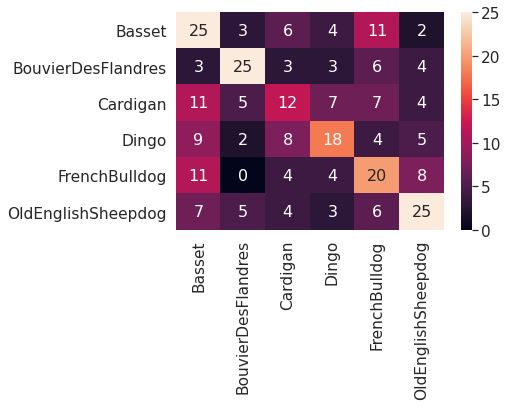

In [31]:
print(f'----- Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f} % -----')

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), small_directory_names, small_directory_names)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()